# **1. Import Packages**

In [76]:
!pip install prince

# **2. Importa libraries**

In [77]:
## Handling data
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


## Factorial Analysis
from prince import MCA

## Typing
from typing import Dict
from typing import List

## Warnings
import warnings
warnings.filterwarnings('ignore')

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Load data**

In [79]:
data = pd.read_csv('/content/drive/MyDrive/kaggle/divers/Suicides_in_India.csv')
data.head()

,State,Year,Type_code,Type,Gender,Age_group
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14


In [80]:
# Data size
print(f'The data set have {data.shape[0]} rows and {data.shape[1]} columns')

The data set have 237519 rows and 6 columns


In [81]:
print('=='*30)
print(' '*12, 'Data set Information')
print('=='*30)
print(data.info())

             Data set Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
dtypes: int64(1), object(5)
memory usage: 10.9+ MB
None


# **4. EDA**

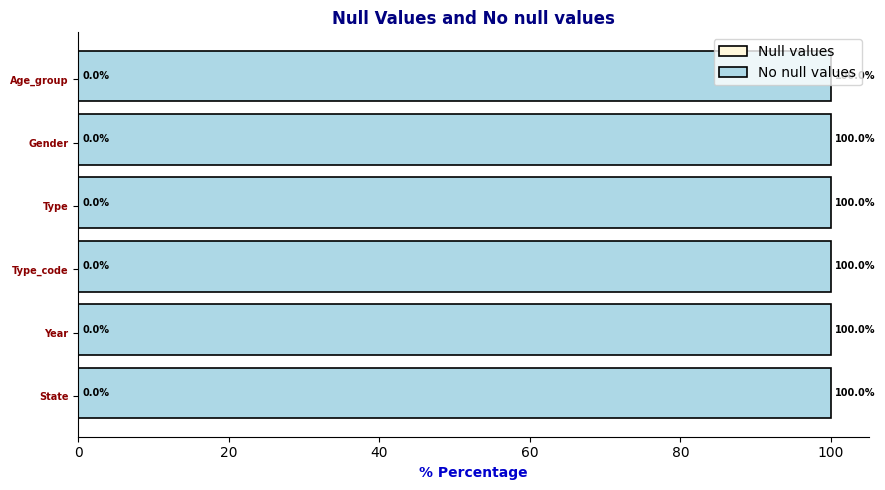

In [82]:
# Null values cheching
df_null_values = data.isnull().sum().to_frame().rename(columns={0:'Count'})
df_null_values['Percent_null'] = (df_null_values['Count']/len(data))*100.
df_null_values['Percent_not_null'] = 100.-df_null_values['Percent_null']

n = len(df_null_values.index)
x = np.arange(n)

fig,ax = plt.subplots(figsize=(9,5))
# Bar chart of train set
rects1 = ax.barh(x, df_null_values.iloc[:,1], label='Null values', linewidth=1.2,edgecolor='black',color='#FFF8DC')
# Bar chart of test set
rects2 = ax.barh(x, df_null_values.iloc[:,2], label='No null values',linewidth=1.2, edgecolor='black', color = '#ADD8E6')

ax.set_title('Null Values and No null values',fontsize=12, fontweight='bold', color = '#000080')
ax.set_xlabel('% Percentage',fontsize=10, fontweight='bold', color = '#0000CD')
ax.set_yticks(x-0.05)
ax.set_yticklabels(df_null_values.index, fontsize=7, fontweight='bold',color='darkred')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

def autolabel(rects):

  for rect in rects:
      width = rect.get_width()
      height = rect.get_height()
      ax.annotate('{}%'.format(width),
                  xy=(width, rect.get_y() + rect.get_height() / 2),
                  xytext=(3,0),
                  textcoords="offset points",
                  ha='left', va='center', size = 7, weight = 'bold')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
fig.show()

In [83]:
# Duplicate data checking
print(f'There are {data.duplicated().sum()} duplicate rows')

There are 3063 duplicate rows


In [84]:
# Remove duplicate rows.
data.drop_duplicates(inplace = True)

# Check again that there are no duplicates.
print(f'There are {data.duplicated().sum()} duplicate rows')

There are 0 duplicate rows


In [85]:
# Data set reset.
data.reset_index(drop=True, inplace = True)

In [86]:
# Remove the blank spaces on either side of each variable name.
data.columns = data.columns.str.strip()
data.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group'], dtype='object')

In [87]:
categorical_graph = data.select_dtypes(include=['object','category']).columns.to_list()
numerical_graph = data.select_dtypes(include=['int','float']).columns.to_list()

print('=='*40)
print(f'Total Categorical Variables = {len(categorical_graph)}')
print('Categorical Variables => Unique values => Total unique values')
print('=='*40)
for categoria in categorical_graph:
    print('*',categoria,'==>',data[categoria].unique(),'==>',data[categoria].nunique(),'\n')

print('=='*40)
print(f'Total Numerical Variables = {len(numerical_graph)}')
print(f'Numerical Variables')
print('=='*40)
for numerica in numerical_graph:
  print('*',numerica)

Total Categorical Variables = 5
Categorical Variables => Unique values => Total unique values
* State ==> ['A & N ISLANDS' 'ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR'
 'CHANDIGARH' 'CHHATTISGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI (UT)'
 'GOA' 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR'
 'JHARKHAND' 'KARNATAKA' 'KERALA' 'LAKSHADWEEP' 'MADHYA PRADESH'
 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA' 'MIZORAM' 'NAGALAND' 'ODISHA'
 'PUDUCHERRY' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TOTAL (ALL INDIA)' 'TOTAL (STATES)' 'TOTAL (UTs)' 'TRIPURA'
 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL'] ==> 38 

* Type_code ==> ['Causes' 'Means_adopted' 'Professional_Profile' 'Education_Status'
 'Social_Status'] ==> 5 

* Type ==> ['Cancer' 'Divorce' 'Dowry Dispute' 'Ideological Causes/Hero Worshipping'
 'Illness (Aids/STD)' 'Paralysis' 'Property Dispute'
 'Suspected/Illicit Relation' 'By Consuming Insecticides'
 'By Fire/Self Immolation' 'By Hanging' 'By Machine'
 'By Other means (please

# **3.1 Univariate Analysis**

In [88]:
def univariate_categorical_plot(data:pd.DataFrame,
                                name_col:str,
                                orientation:str='h',
                                pie:bool=False)->None:

    fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,10))
    df1 = data[name_col].value_counts().to_frame()
    k = list(str(i) for i in data[name_col].value_counts().to_frame().index)

    if orientation == 'h':
      rects1 = ax[0].barh(k, df1.iloc[:,0], linewidth = 1.1, edgecolor = 'w', color = '#00FF00')
      ax[0].set_title('',fontsize=14,fontweight='bold',color='blue')
      ax[0].tick_params(labelsize=8, size=7)
      ax[0].spines['top'].set_visible(False)
      ax[0].spines['left'].set_visible(False)
      ax[0].spines['bottom'].set_visible(True)
      ax[0].spines['right'].set_visible(False)

      def autolabel(rects):

        for rect in rects:
            width = rect.get_width()
            height = rect.get_height()
            ax[0].annotate('{}'.format(width),
                        xy=(width, rect.get_y() + rect.get_height() / 2),
                        xytext=(3,0),
                        textcoords="offset points",
                        ha='left', va='center', size = 7, weight = 'bold')

      autolabel(rects1)

    else:
      rects1 = ax[0].bar(k, df1.iloc[:,0], linewidth = 1.1, edgecolor = 'w', color = '#00FF00')
      ax[0].set_title('',fontsize=14,fontweight='bold',color='blue')
      ax[0].tick_params(labelsize=8, size=7)
      ax[0].spines['top'].set_visible(False)
      ax[0].spines['right'].set_visible(False)

      def autolabel(rects):

        for rect in rects:

            height = rect.get_height()
            ax[0].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom', size = 7, weight = 'bold')

      autolabel(rects1)

    if pie == False:
      fig.delaxes(ax[1])
      ax[0].set_title(f'Categorical Variable: {name_col}', color = 'darkred', fontsize = 12, fontweight = 'bold')
      fig.show()

    else:
      # 2. Pie chart.
      def func(pct, allvalues):

          absolute = int(pct/100.*np.sum(allvalues))
          return "{:.1f}%".format(pct)

      counts = data[name_col].value_counts()


      labels = counts.index.tolist()
      values = counts.values.tolist()

      cmap = plt.get_cmap('tab20')


      colors = cmap(np.arange(len(labels)))
      # Crear el gráfico de pie
      ax[1].pie(x = values, labels = labels, autopct = lambda pct: func(pct,counts.values),
            startangle=45, colors = colors, wedgeprops={'linewidth':2,'edgecolor':'black'},
            textprops = {'color':'black', 'weight':'bold','fontsize':10})
      ax[1].set_title('', fontsize = 14, fontweight = 'bold', color = 'blue')
      ax[1].axis('equal')

      fig.suptitle(f'Categorical Variable: {name_col}', color = 'darkred', fontsize = 12, fontweight = 'bold')
      fig.subplots_adjust(top=0.9)
      fig.tight_layout()
      fig.show()

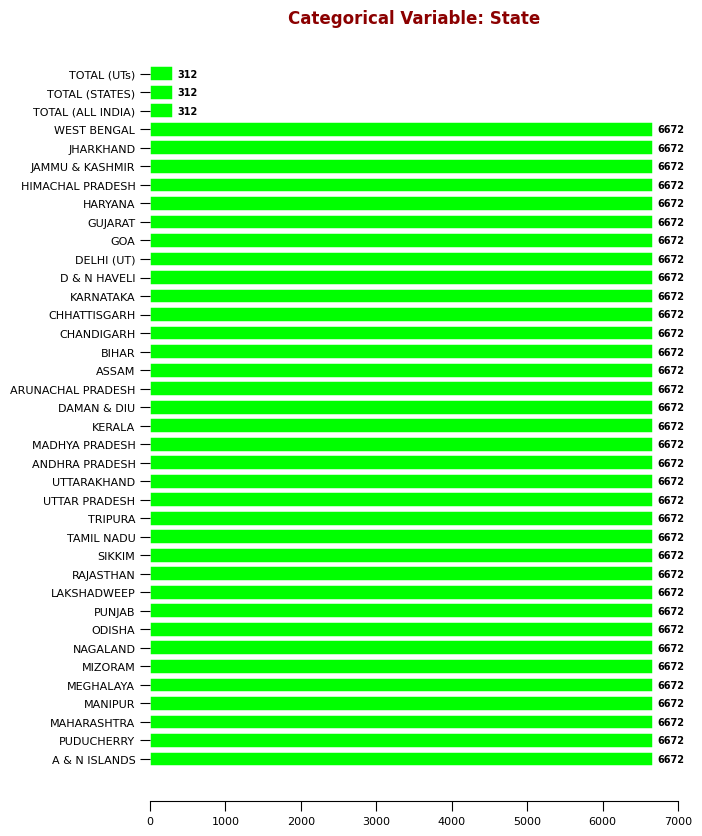

In [89]:
univariate_categorical_plot(data, categorical_graph[0], 'h')

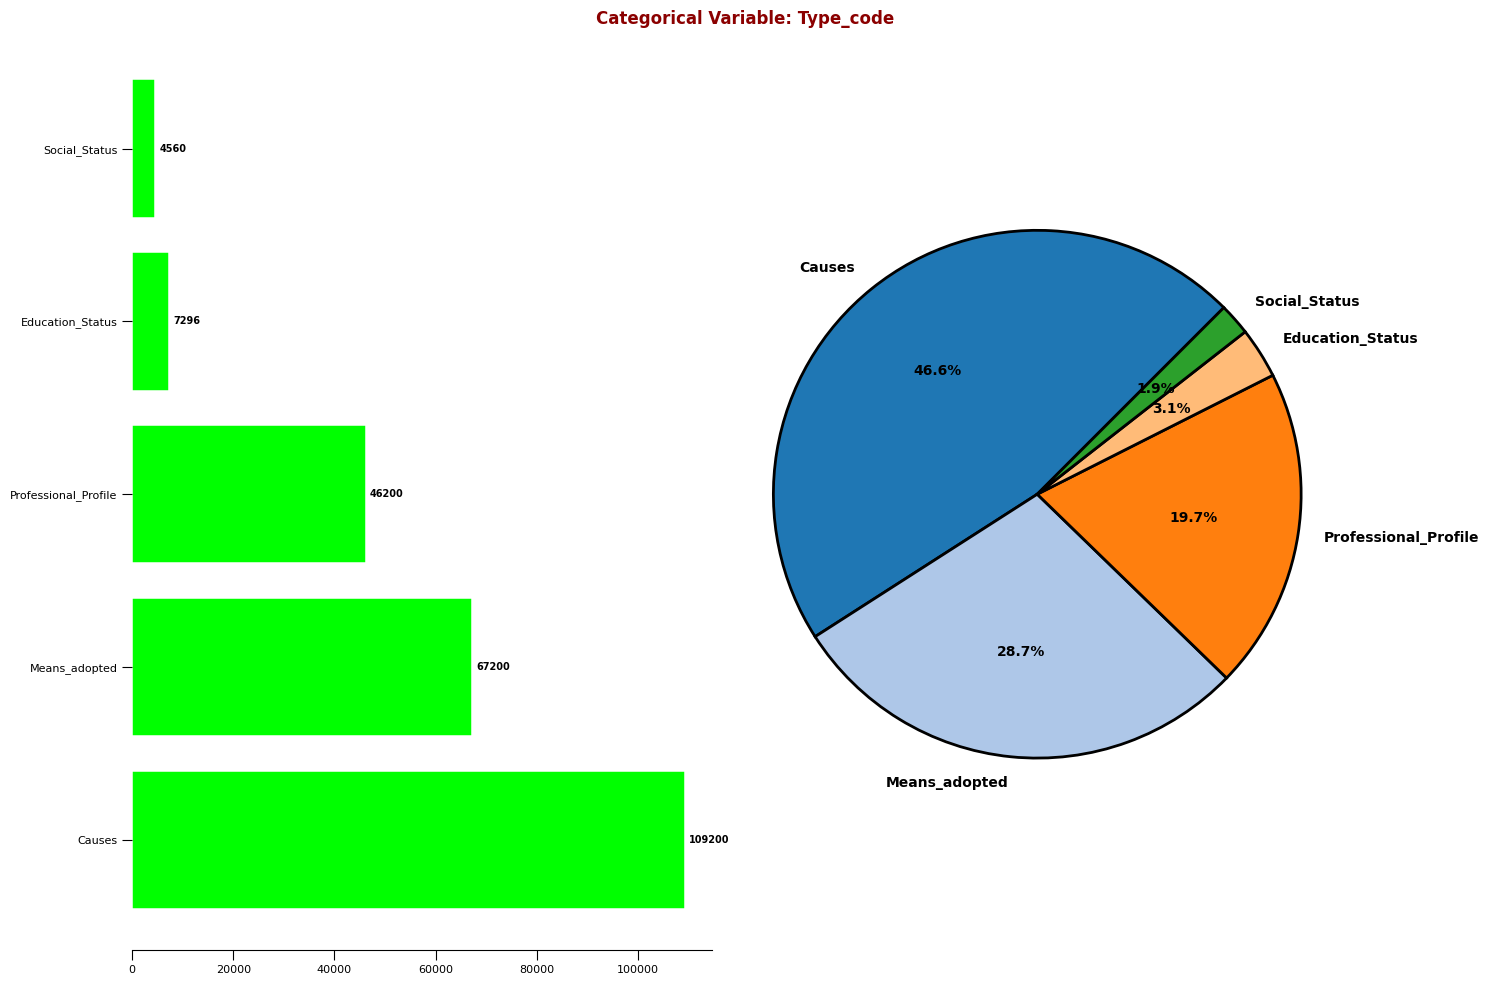

In [90]:
univariate_categorical_plot(data, categorical_graph[1], 'h', True)

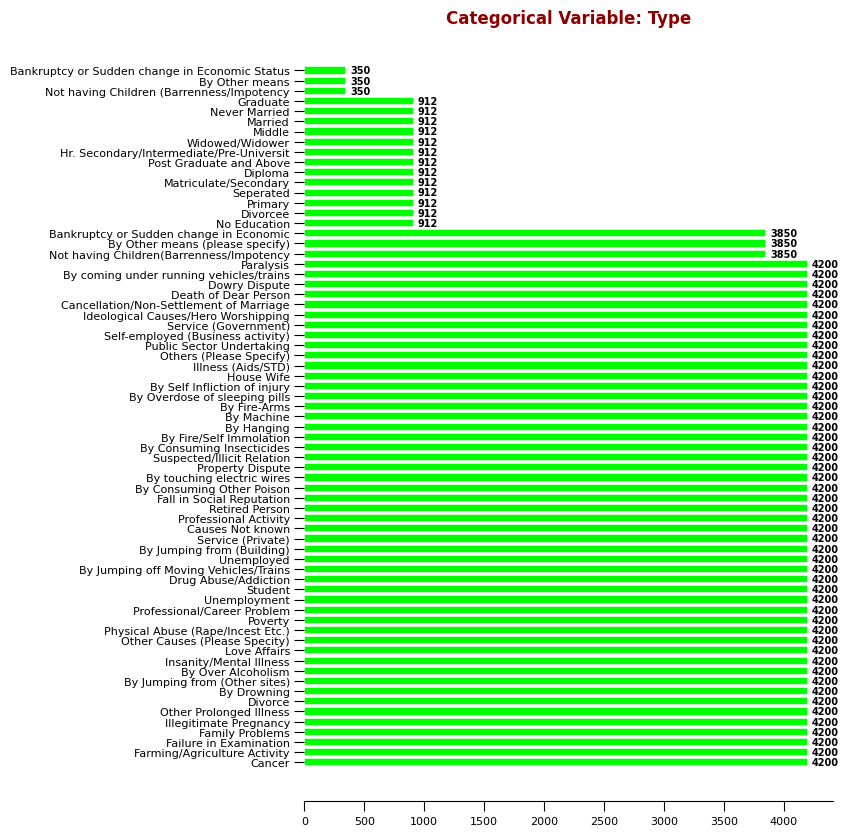

In [91]:
univariate_categorical_plot(data, categorical_graph[2], 'h')

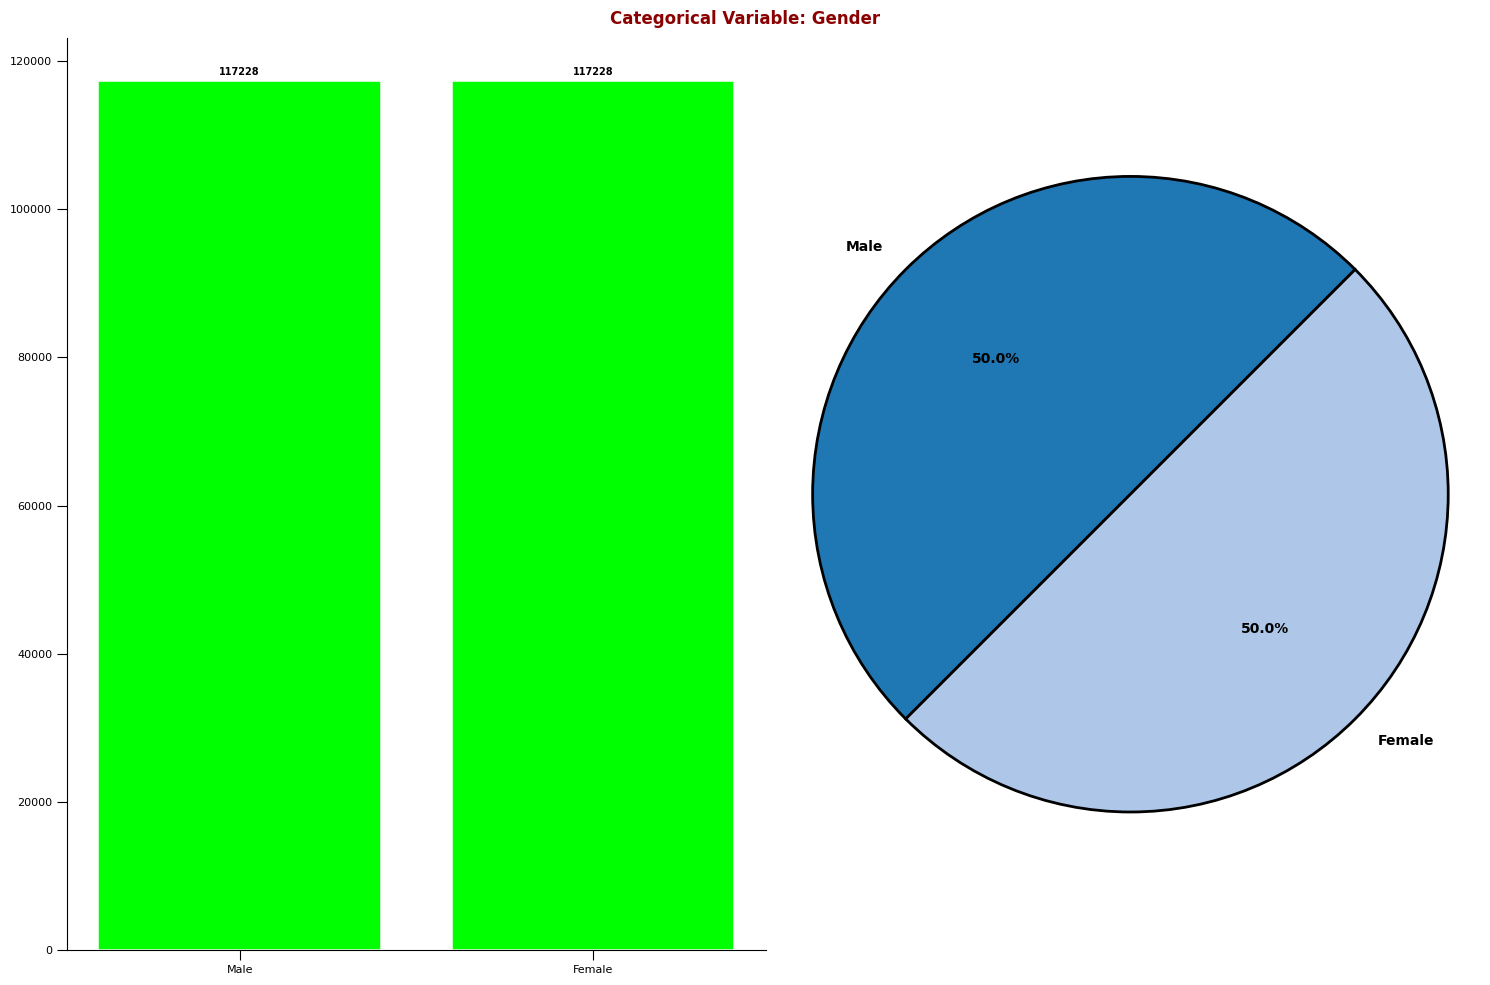

In [92]:
univariate_categorical_plot(data, categorical_graph[3], 'v',True)

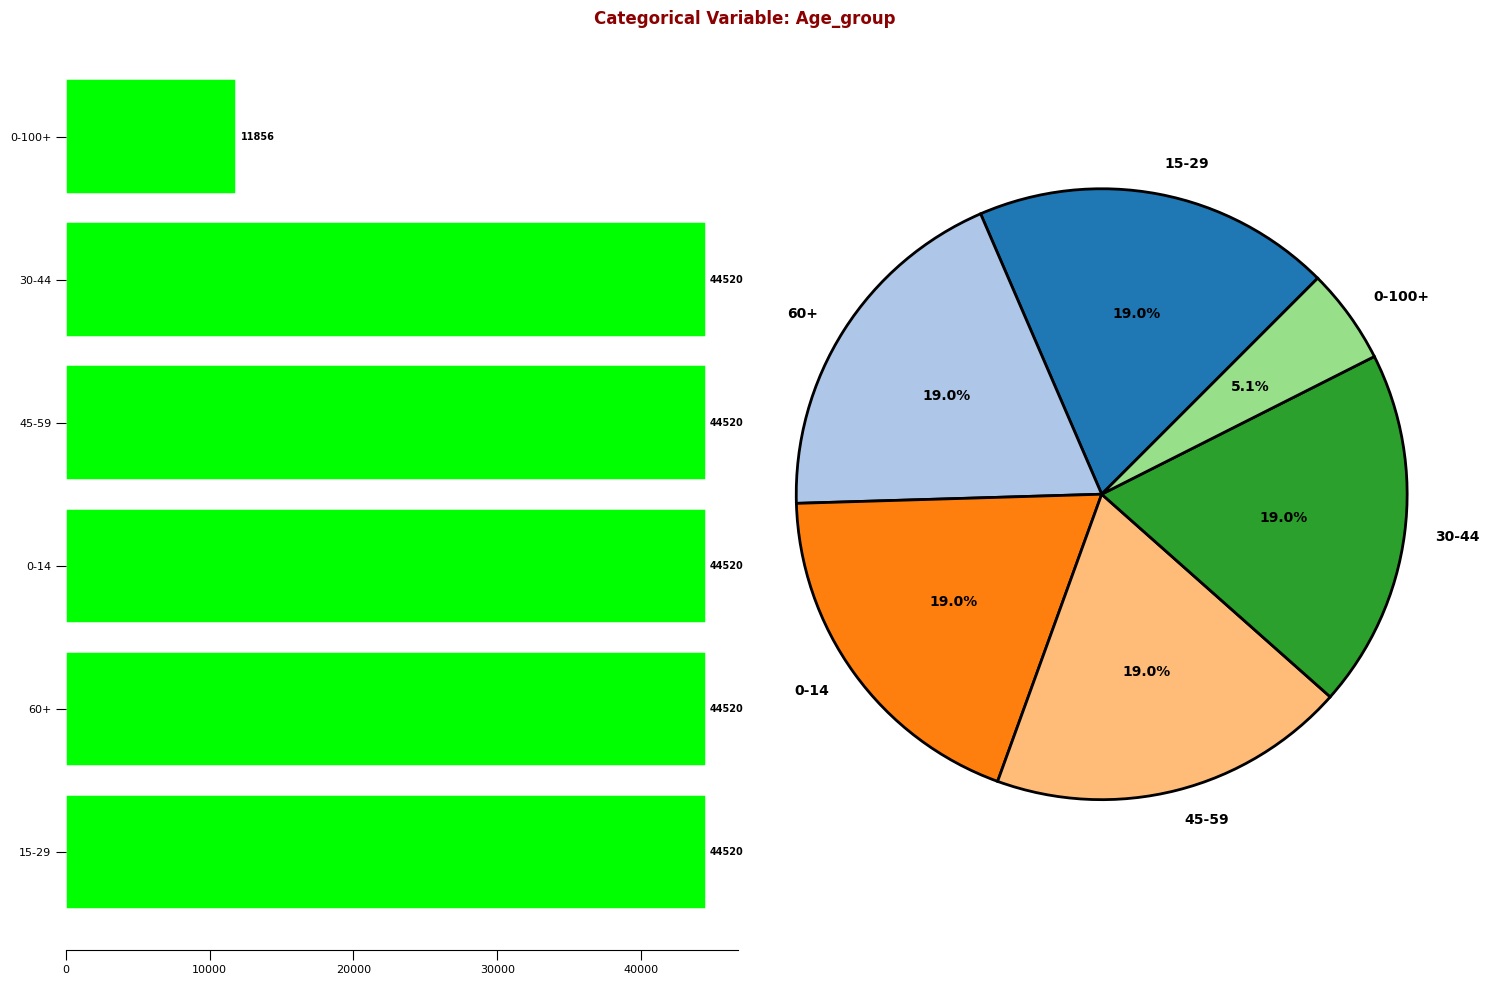

In [93]:
univariate_categorical_plot(data, categorical_graph[4], 'h',True)

# **3.2 Bivariate Analysis**

In [94]:
def bivariate_categorical_plot(data:pd.DataFrame, var_1:str, var_2:str)->None:

  df = pd.crosstab(data[var_1],data[var_2])

  n = len(df.index)
  x = np.arange(n)

  # size bar
  width = 0.3

  fig,ax = plt.subplots(figsize=(12,4))
  for k in range(len(df.columns)):
    # Bar chart of train
    rects1 = ax.bar(x-width, df.iloc[:,0], width=width, linewidth=1.6, edgecolor='black',color='#00FF00')

    # Bar chart of test
    rects2 = ax.bar(x, df.iloc[:,1], width=width, linewidth=1.6, edgecolor='black', color = '#4B0082')


  ax.set_title(f'{var_1} vs {var_2}',fontsize=12, fontweight='bold', color = 'darkred')
  ax.set_ylabel('Count',fontsize=10, fontweight='bold')
  ax.set_xticks(x-0.13)
  ax.set_xticklabels(df.index, fontsize=7, fontweight='bold')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.legend(df.columns, loc='best')

  def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 7, weight = 'bold')

  autolabel(rects1)
  autolabel(rects2)
  fig.subplots_adjust(top=0.9)
  fig.tight_layout()
  fig.show()

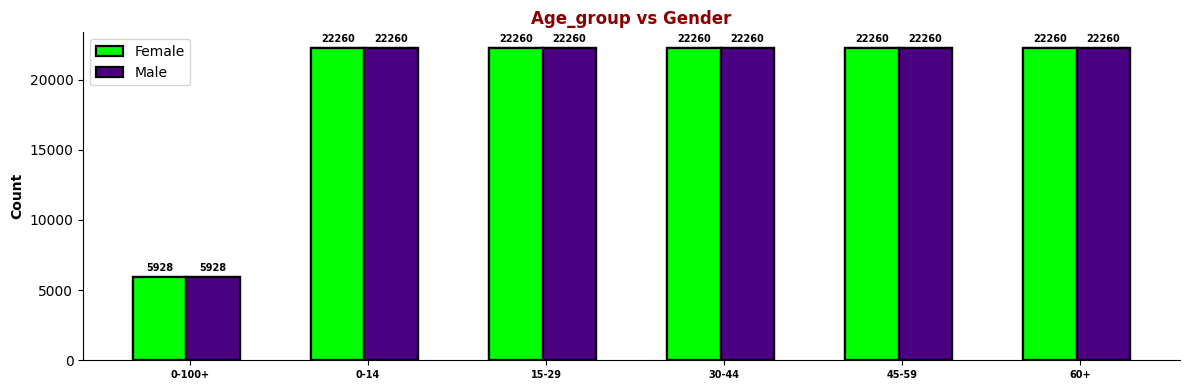

In [95]:
bivariate_categorical_plot(data, categorical_graph[4], categorical_graph[3])

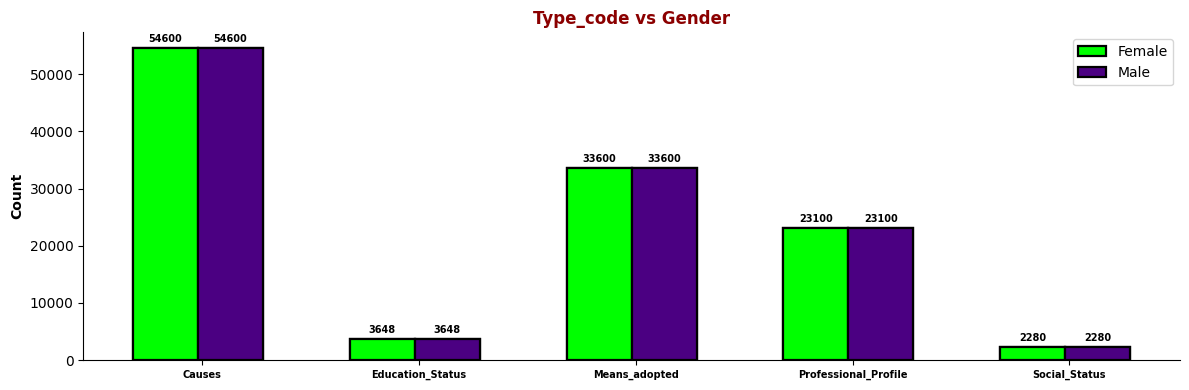

In [96]:
bivariate_categorical_plot(data, categorical_graph[1], categorical_graph[3])

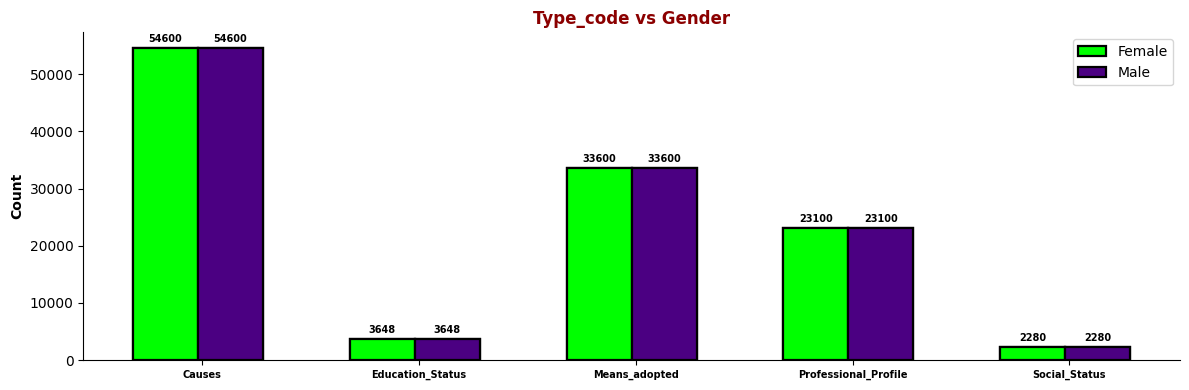

In [97]:
bivariate_categorical_plot(data, categorical_graph[1], categorical_graph[3])

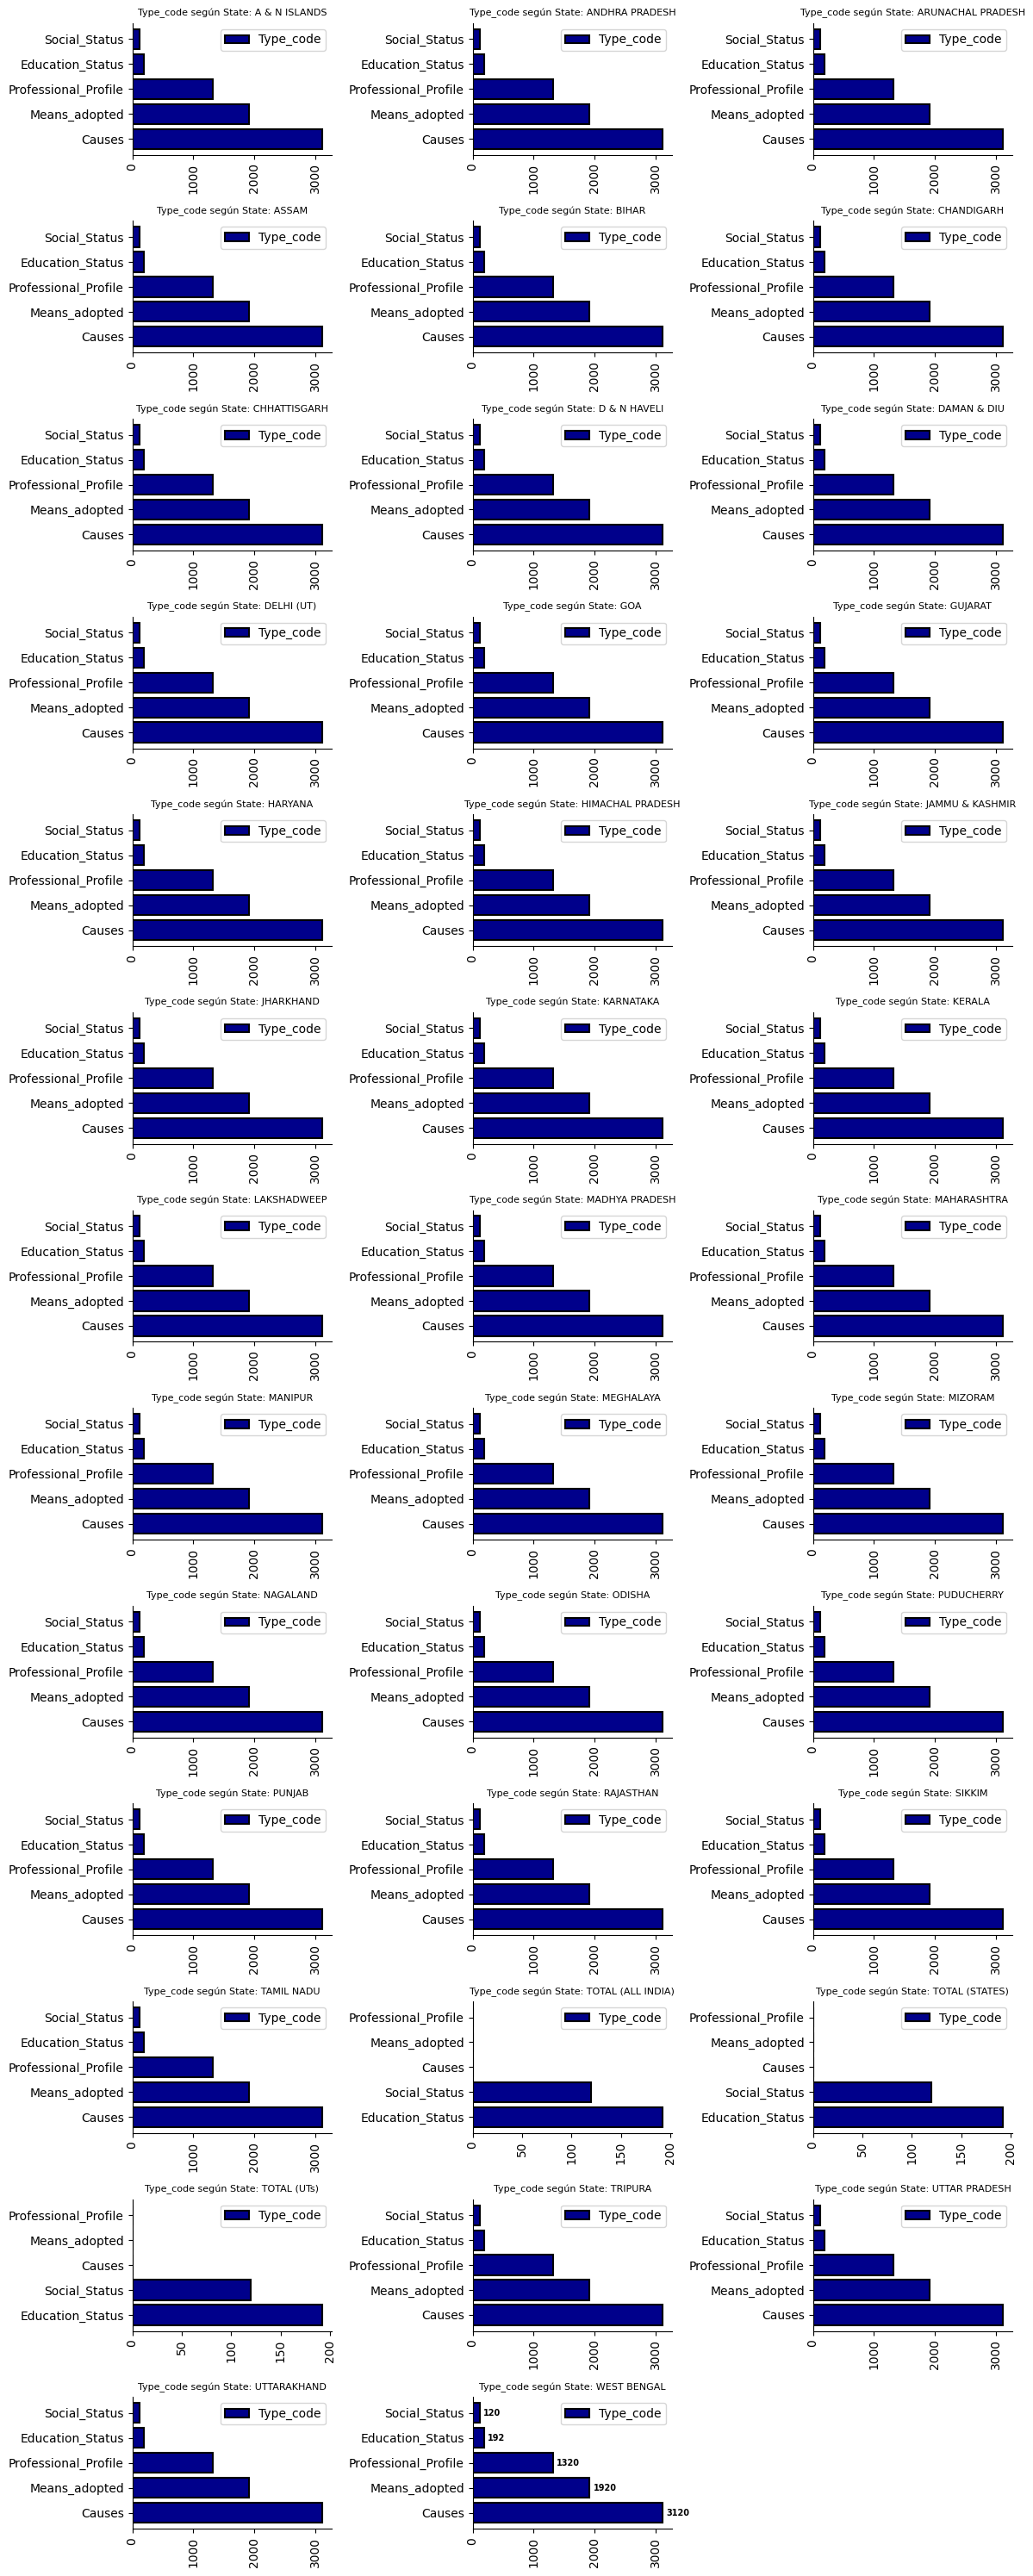

In [98]:
## Type_code vs State

fig,ax = plt.subplots(13,3,figsize = (12,30))
ax = ax.flat
p = pd.crosstab(data[categorical_graph[1]], data[categorical_graph[0]])
for i in range(0,38):
  q = p.iloc[:,i:1+i].sort_values(p.columns[i], ascending = False)
  rects = ax[i].barh(q.index, q.iloc[:,0], label = categorical_graph[1],color = 'darkblue', edgecolor = 'black', linewidth = 1.5)
  ax[i].set_title(f'{categorical_graph[1]} según {categorical_graph[0]}: {q.columns[0]}', fontsize=8)
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].tick_params('x',rotation=90)
  ax[i].legend()
  def autolabel(rects):

    for rect in rects:
        width = rect.get_width()
        height = rect.get_height()
        ax[i].annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3,0),
                    textcoords="offset points",
                    ha='left', va='center', size = 7, weight = 'bold')

for k in [38]:
  fig.delaxes(ax[k])

  autolabel(rects)
  fig.subplots_adjust(top=0.9)
  fig.tight_layout()
  fig.show()

In [99]:
categorical_graph

['State', 'Type_code', 'Type', 'Gender', 'Age_group']

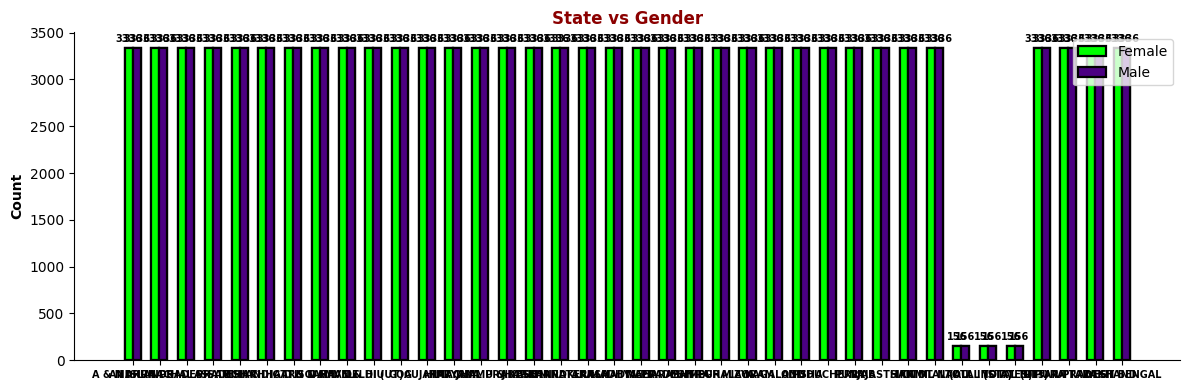

In [100]:
bivariate_categorical_plot(data,categorical_graph[0],categorical_graph[3])

# **3.3 Multivariate Analysis**

In [101]:
mca = MCA(n_components = 2,
            n_iter = 10,
            random_state = 42)
mca.fit(data)

MCA(random_state=42)

In [102]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.518,2.47%,2.47%
1,0.333,1.59%,4.05%


In [103]:
mca.column_coordinates(data)

,0,1
State_A & N ISLANDS,-0.024526,0.000360
State_ANDHRA PRADESH,-0.024568,-0.000145
State_ARUNACHAL PRADESH,-0.024551,-0.000174
State_ASSAM,-0.024563,-0.000690
State_BIHAR,-0.024538,-0.000788
...,...,...
Age_group_0-14,-0.229112,0.000261
Age_group_15-29,-0.229115,0.000332
Age_group_30-44,-0.229119,-0.000119
Age_group_45-59,-0.229121,-0.000114


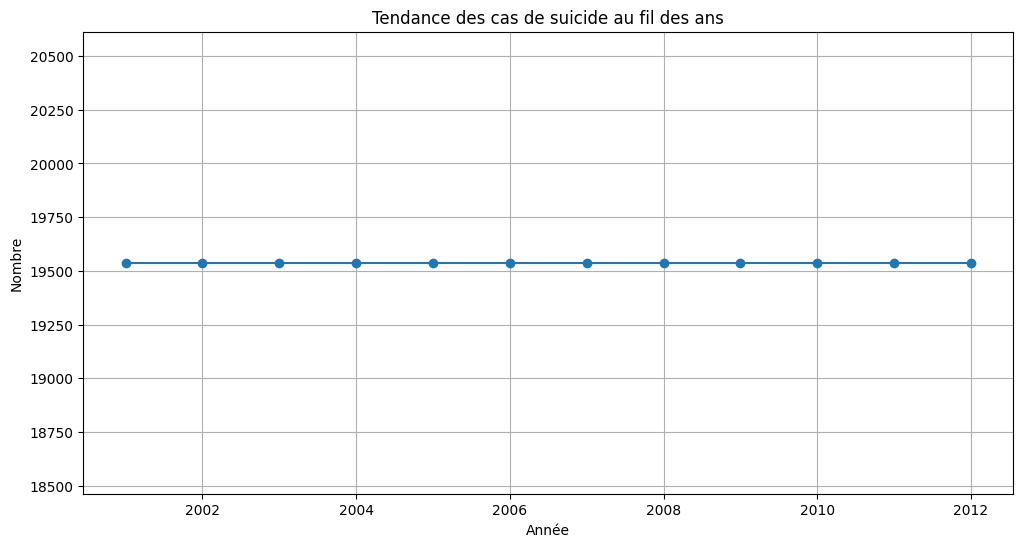

In [104]:
plt.figure(figsize=(12, 6))
time_series = data.groupby('Year')['Type'].count()
time_series.plot(marker='o')
plt.title("Tendance des cas de suicide au fil des ans")
plt.xlabel("Année")
plt.ylabel("Nombre")
plt.grid(True)
plt.show()


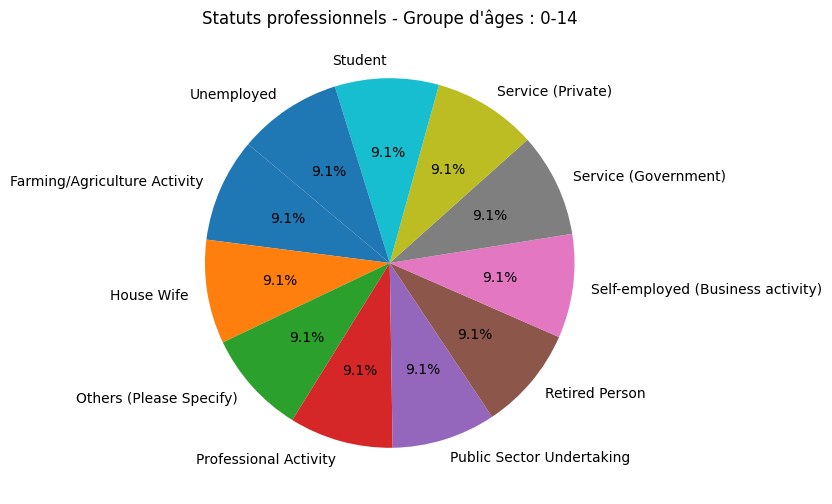

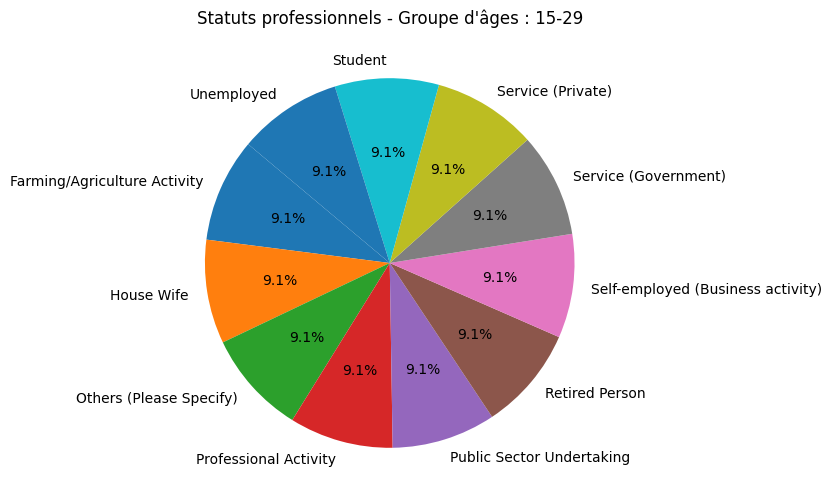

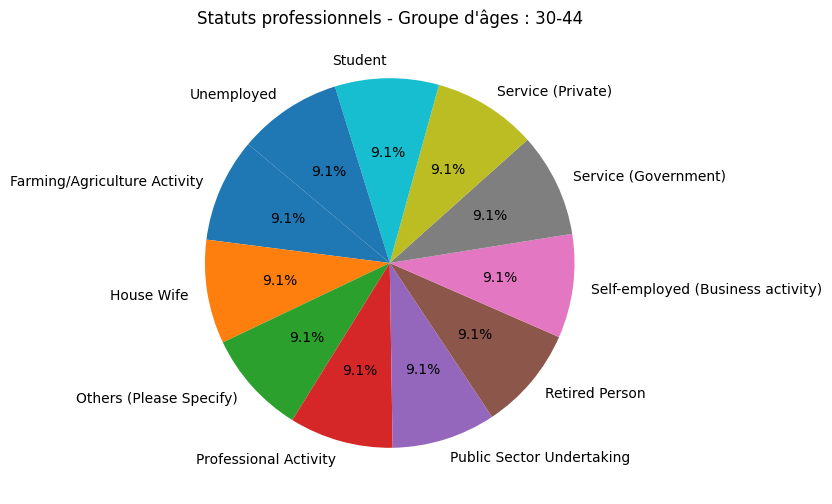

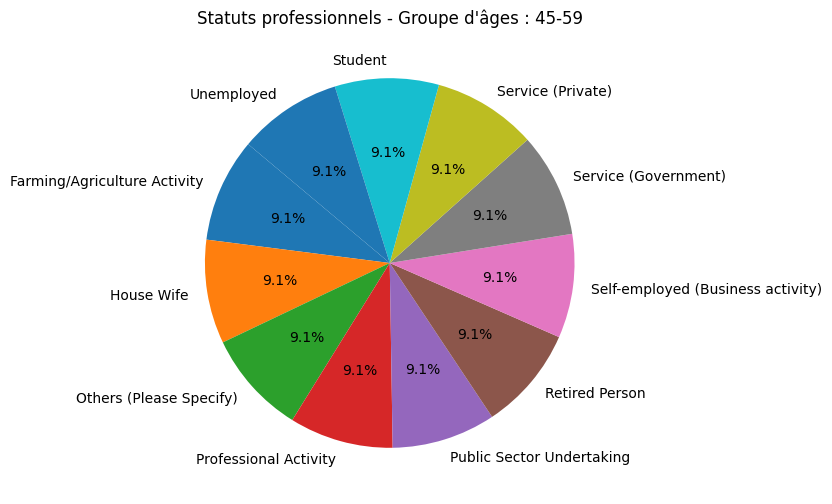

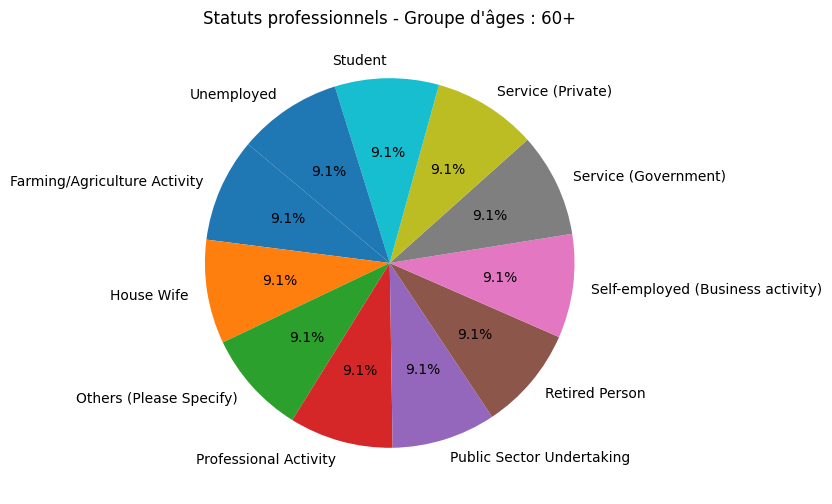

In [105]:
# Filtrer les données pour le Type_Code "professional_profile"
data_professional = data[data['Type_code'] == 'Professional_Profile']

# Créer une pivot table pour les statuts professionnels par groupe d'âges
pivot_professional = data_professional.pivot_table(index='Age_group', columns='Type', aggfunc='size', fill_value=0)

# Créer des diagrammes en camembert pour chaque groupe d'âges
for age_group, row_data in pivot_professional.iterrows():
    plt.figure(figsize=(6, 6))
    plt.pie(row_data, labels=row_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Statuts professionnels - Groupe d'âges : {age_group}")
    plt.show()

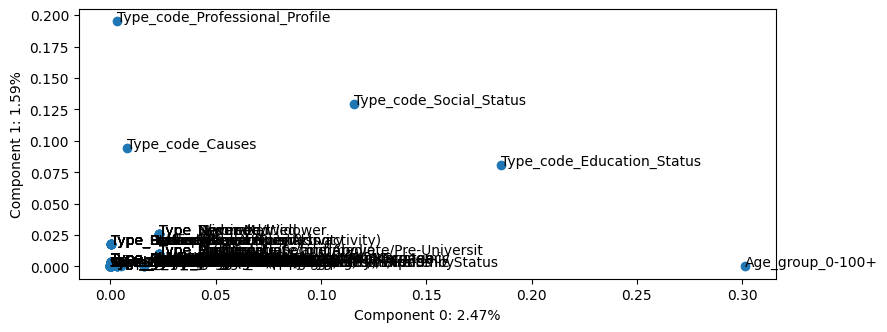

In [106]:
plt.figure(figsize=(9,3.5))
plt.scatter(mca.column_contributions_[0], mca.column_contributions_[1])

# Label the points with the name of the variables
for i, txt in enumerate(mca.column_contributions_.index):
    plt.annotate(txt, (mca.column_contributions_[0][i], mca.column_contributions_[1][i]))


plt.xlabel(f'Component 0: {mca.eigenvalues_summary.iloc[:,1:2].iloc[0,0]}')
plt.ylabel(f'Component 1: {mca.eigenvalues_summary.iloc[:,1:2].iloc[1,0]}')

plt.show()